In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
import seaborn as sns

In [ ]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# adding up the target value
bos['MEDV'] = boston.target

In [ ]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# making copy of the data
df = bos.copy()

Data Preprocessing

In [ ]:
# checking if any null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

there are no missing or nan values in the dataset features available.

In [ ]:
# divind the dataset into feature and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

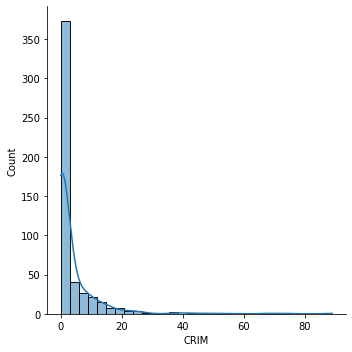

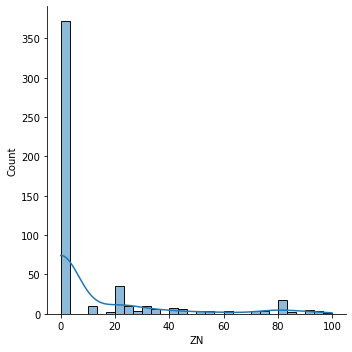

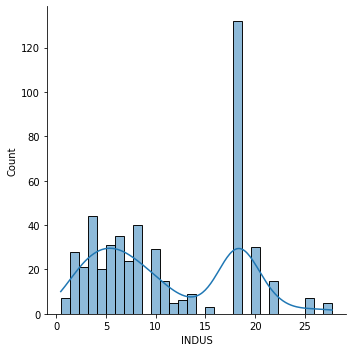

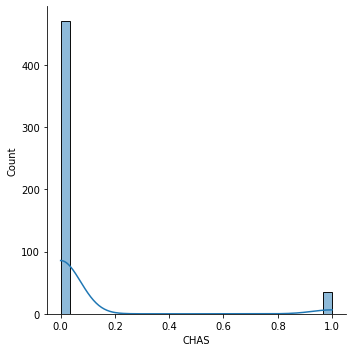

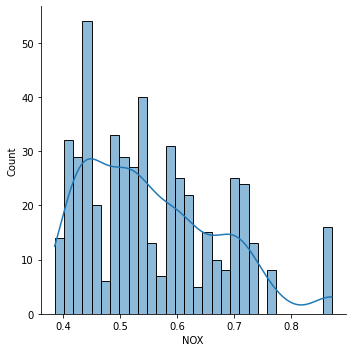

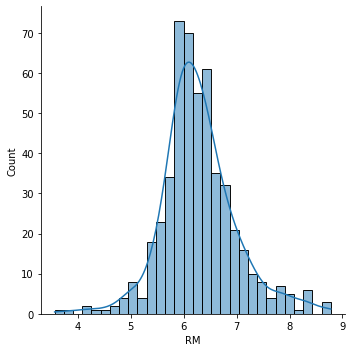

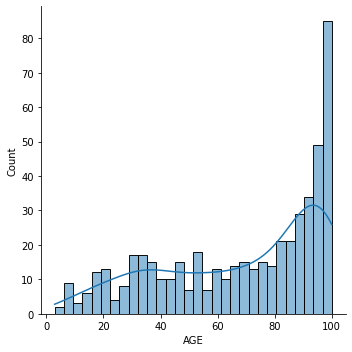

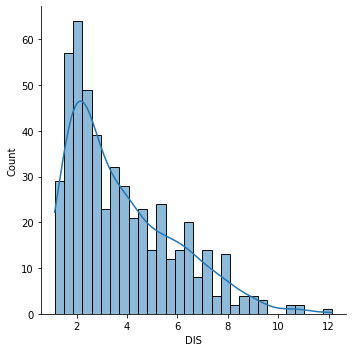

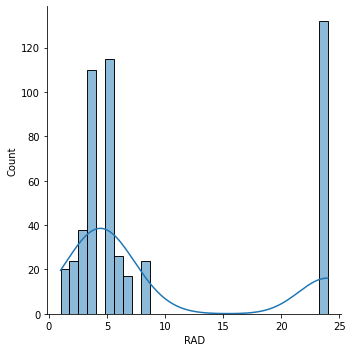

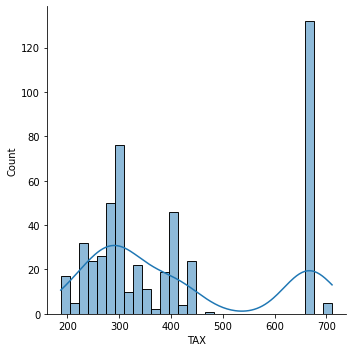

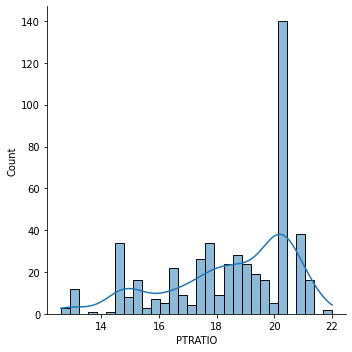

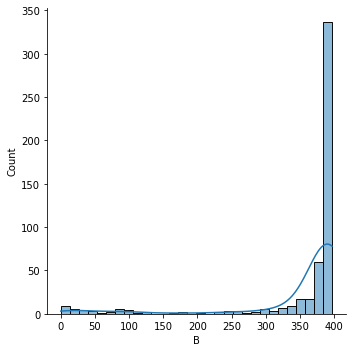

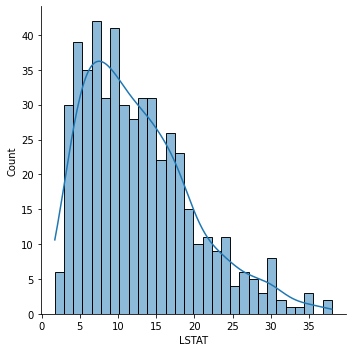

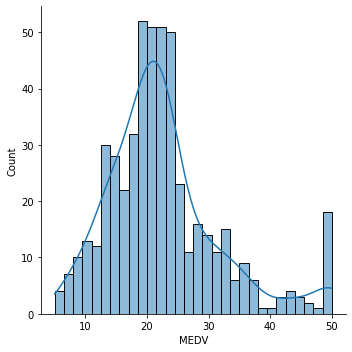

In [ ]:
for column in df:
  sns.displot(df[column], bins=30, kde=True)
  plt.show()

Conclusion:-  Looking at the graph we can see there are skewness in the almost feature of the dataset.
and there is some outliers are present in the datset too.

Correlation matrix

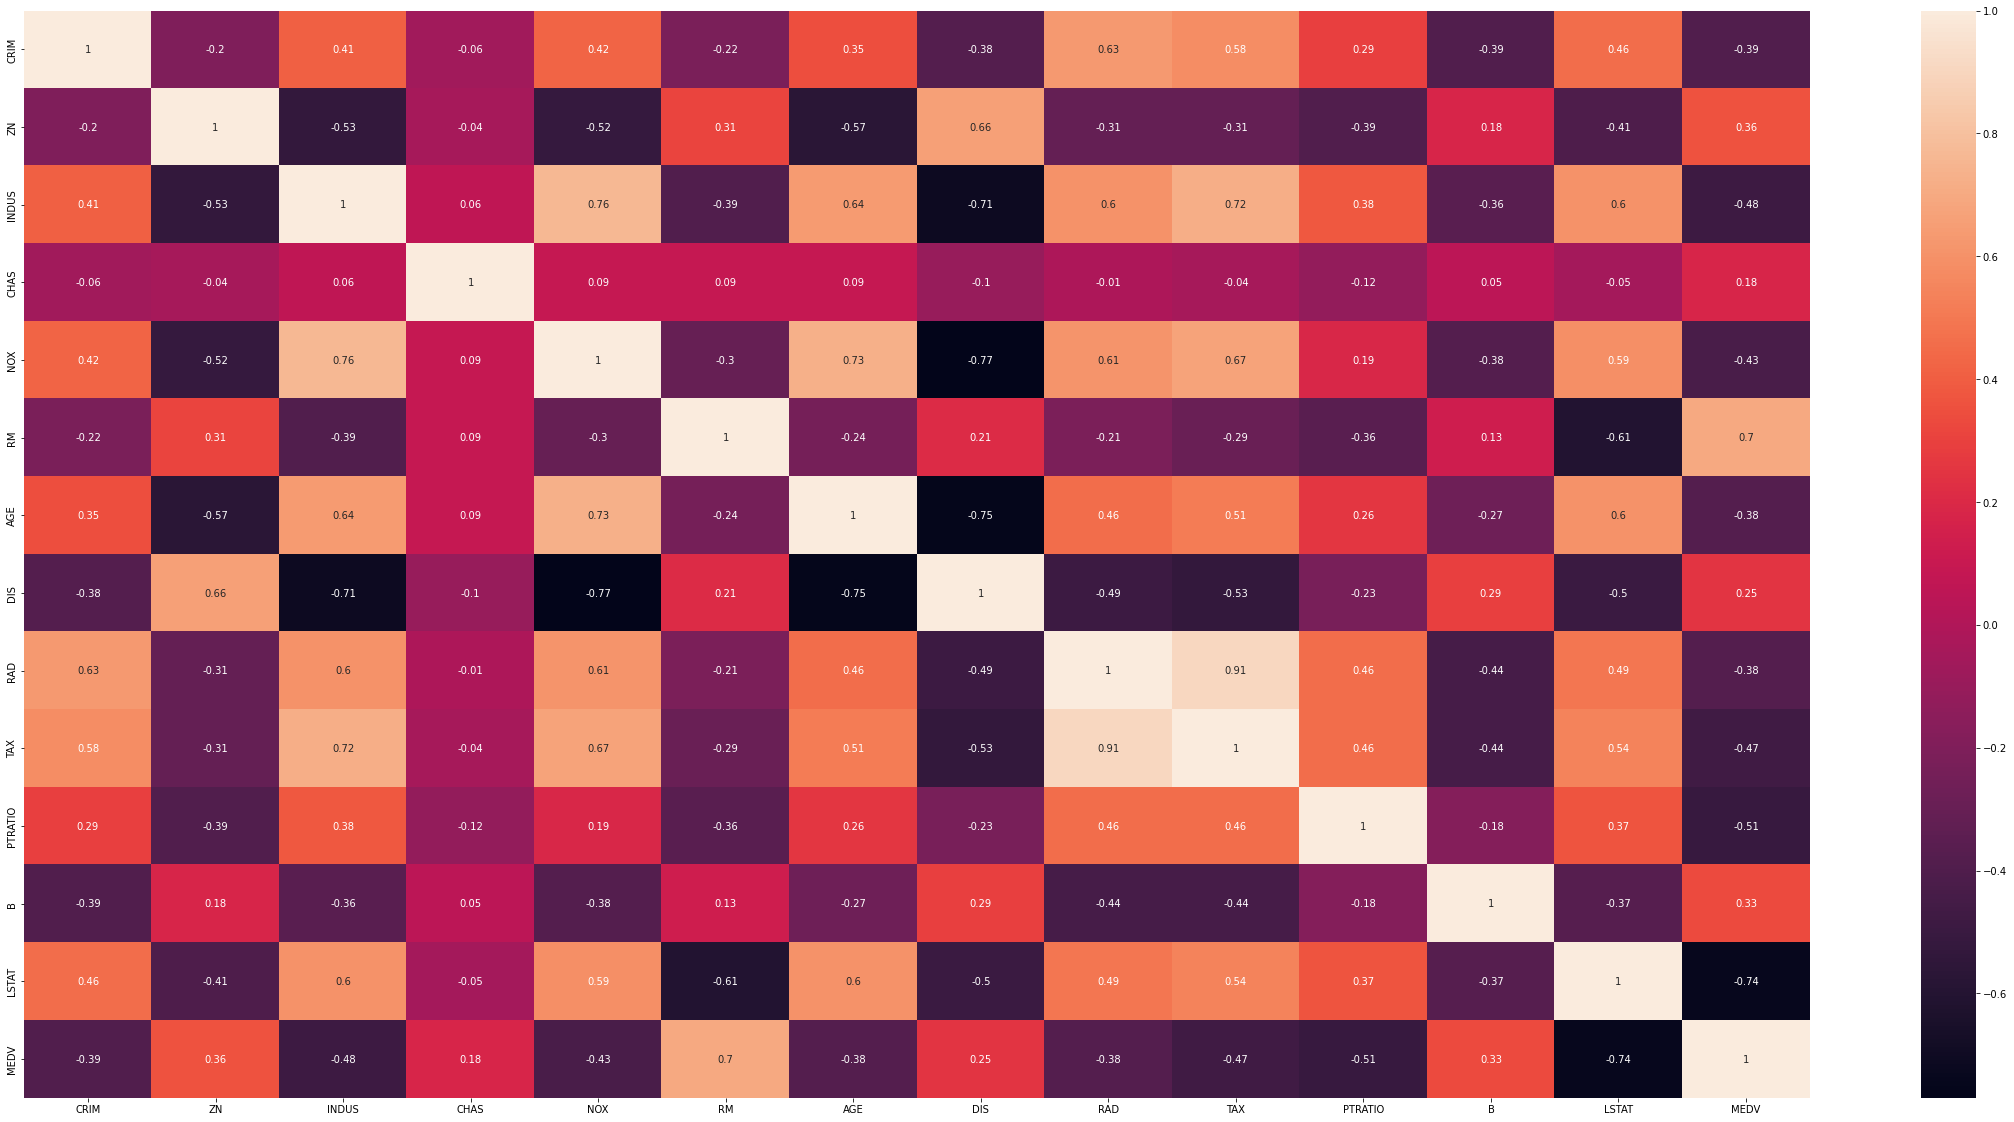

In [ ]:
plt.figure(figsize=(40,20))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data = correlation_matrix, annot=True)

confusion matrix give us the value about the relation between two feature in the scale of -1 to 1. value close to 1 means the features are highly correlated while the value close to -1 mean there is no correlationship b/w the variable/feature.

1. from the corrlation matrix we can clearly see 'RM' is having very high positive correlation with our target value and at the same time LSTAT is having highest negative correlation.

2. at the same time we have to check for multi-colinearity from the confusion matric itself we can see feature TAX and RAD feature is having 91% of similarty.

In [ ]:
# let's remove the multi-colinearity  and select one feature.
# this function will help us in deselecting one feature if the similarty between them is correspnding to the percenage.
def findData(percentage:float, corr, df):
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= percentage:
                if columns[j]:
                    columns[j] = False
    selected_columns = df.columns[columns]
    data = df[selected_columns]
    return data

In [ ]:
data = findData(0.90, corr = correlation_matrix, df = df) # we have the data without the colinearity having equal or greater than 0.9

In [ ]:
print(f'multi-colinearity {set(df.columns)-set(data.columns)} column has been removed')

multi-colinearity {'TAX'} column has been removed


In [ ]:
def selectColumn(corr, percentage=float):
  pos_corr = corr.loc[corr >= percentage ].index.to_list()
  neg_corr = corr.loc[corr <= -percentage ].index.to_list()
  return pos_corr + neg_corr


In [ ]:
feature  = selectColumn(corr=correlation_matrix['MEDV'].sort_values()[:-1], percentage=0.5 )

In [ ]:
feature

['RM', 'LSTAT', 'PTRATIO']

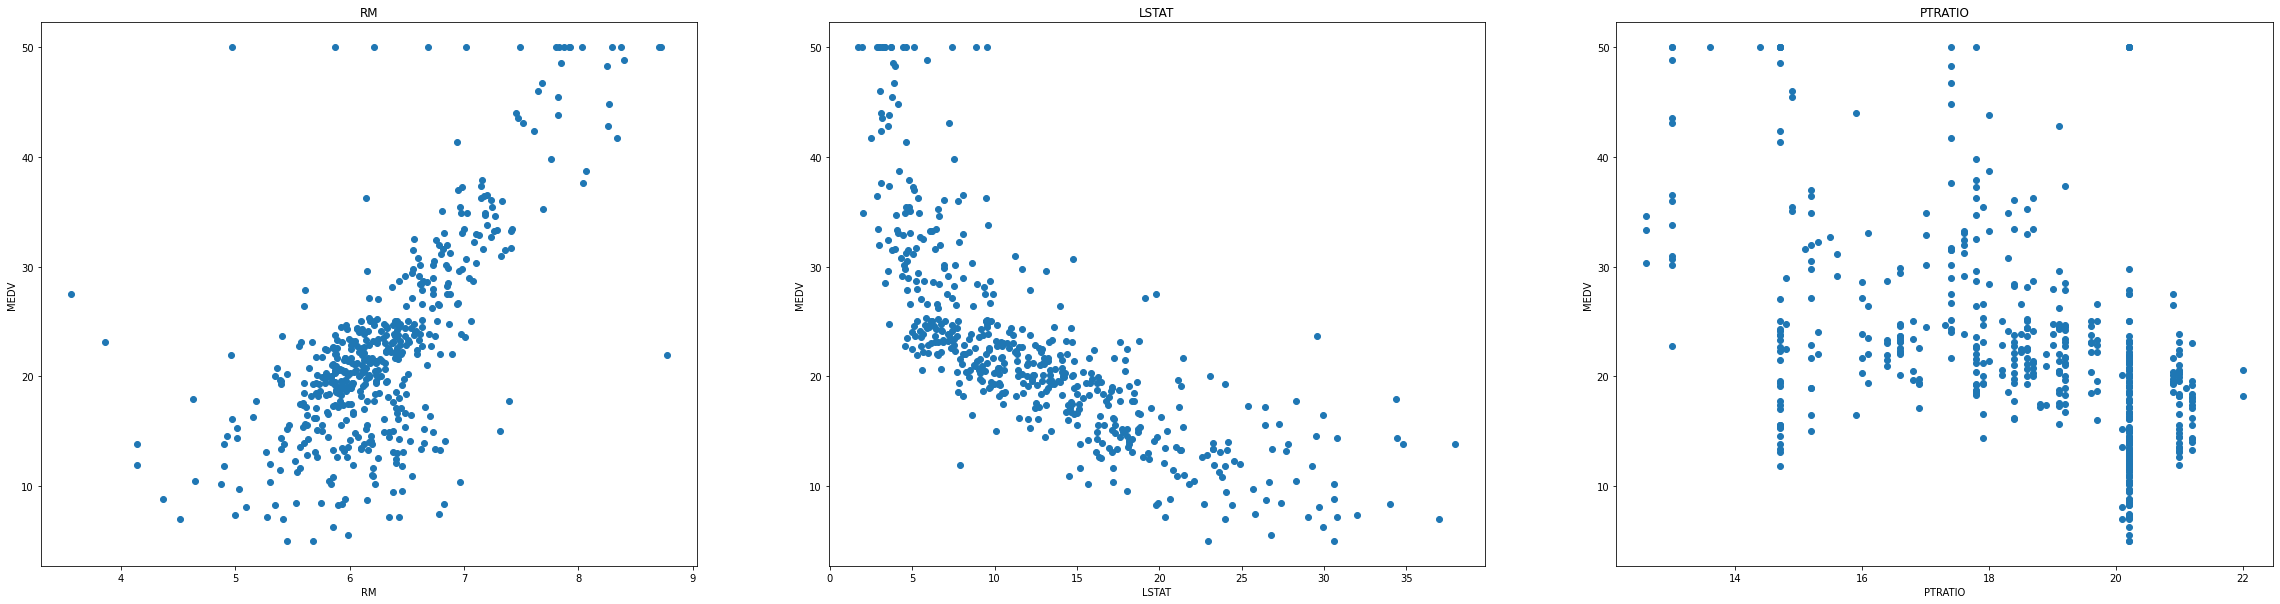

In [ ]:
# let's plot scatter plot with the new feature
plt.figure(figsize=(40, 10))
for i, col in enumerate(feature):
    plt.subplot(1, len(feature) , i+1)
    x = X[col]
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Observations:- 
  1. we can clearly see that as feature 'RM' value increase the Median value prive also get increased.
  2. for feature 'LSTAT' there is clear negative relationship i.e. if the feature value increase the median value will get decrease.
  3. 'PTRATIO' has not much negative correlation but yes there is some and if the value is increase then for some it will get decrease.

In [ ]:
# here i am just trying to make a function to all our outlier analysis
def checkOutliers(columnName:str, data):
  sns.boxplot(data[columnName])
  plt.show()
  Q1 = np.percentile(data[columnName], 25,
                   interpolation = 'midpoint')
 
  Q3 = np.percentile(data[columnName], 75,
                    interpolation = 'midpoint')
  IQR = Q3 - Q1

  upperLimit = Q3 +1.5*IQR
  lowerLimit = Q1 - 1.5*IQR
  # Upper Bound
  upperValues = np.where(data[columnName] >= upperLimit)
  # Lower bound
  lowerValues = np.where(data[columnName] <=  lowerLimit)
  # i am not printing the values 
  #print(f'Upper Values -\n {upperValues}\nLower values -\n{lowerValues}')
  print(f'there is {np.count_nonzero(upperValues)} upper bound values and {np.count_nonzero(lowerValues)} lower bound values ')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


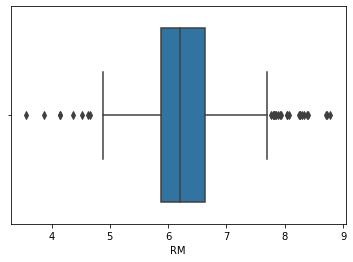

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


there is 22 upper bound values and 8 lower bound values 


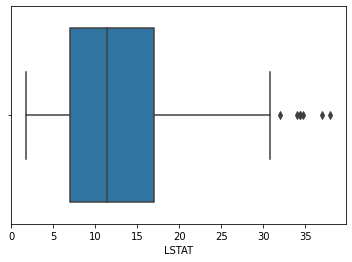

there is 7 upper bound values and 0 lower bound values 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


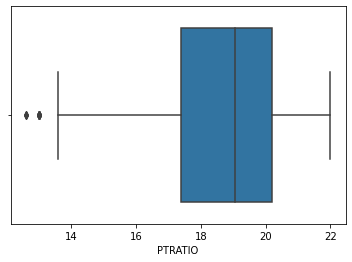

there is 0 upper bound values and 15 lower bound values 


In [ ]:
# let's check for outliers in the corresponding features
for column in feature:
  checkOutliers(column, df)

Observations:
 1. we can clearly seen that 'RM' feature has 22 upper outliers and 8 lower bound outliers present.
 2. for feature LSTAT there is 7 upper cound oulier.
 3. and in PTRATIO there is 15 lower bound outliers are present.

Modelling without removing the outliers

In [ ]:
X = df[feature]

In [ ]:
X.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.30386319330793
R2 score is 0.6725214335656512


The model performance for testing set
--------------------------------------
RMSE is 4.913937534764079
R2 score is 0.6915878280744175


# let's remove the outliers and then make the model

In [ ]:
import scipy.stats 
import numpy as np
rm_value = scipy.stats.mstats.winsorize(X['RM'],limits=0.05)

In [ ]:
def removeOutlier(df):
  data = {}
  for col in df:
    value = scipy.stats.mstats.winsorize(df[col],limits=0.05)
    data[col] = value
  return pd.DataFrame(data)

In [ ]:
new_df = removeOutlier(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


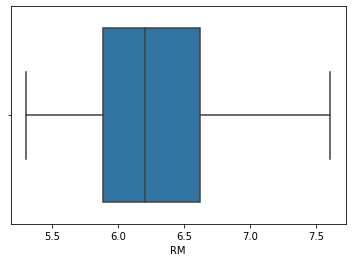

there is 0 upper bound values and 0 lower bound values 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


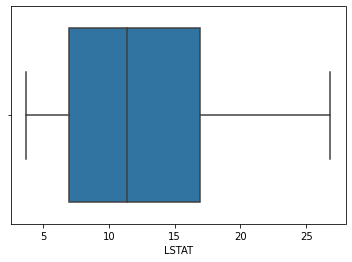

there is 0 upper bound values and 0 lower bound values 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


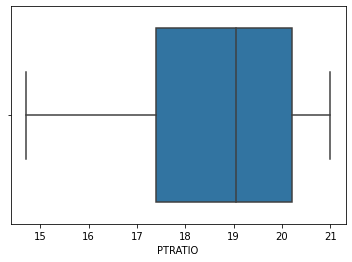

there is 0 upper bound values and 0 lower bound values 


In [ ]:
# let's check the outliers again
for col in new_df:
  checkOutliers(data=new_df, columnName=col)

So now we have remove our outlier's et's train the new model again

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_df, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model2 = LinearRegression()
lin_model2.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# model evaluation for training set
y_train_predict = lin_model2.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model2.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.224588419752145
R2 score is 0.6822376631765164


The model performance for testing set
--------------------------------------
RMSE is 4.494734955573488
R2 score is 0.7419639282720337


There is definetly increase in R2 score. 

let's scale the dataset and train once again

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
new_df_2 = scaler.fit_transform(new_df)

In [ ]:
new_df_2

array([[ 0.49414347, -1.14019343, -1.57992292],
       [ 0.23038456, -0.50830562, -0.34598917],
       [ 1.5389028 , -1.28449473, -0.34598917],
       ...,
       [ 1.18094427, -1.039942  ,  1.23344603],
       [ 0.8692292 , -0.91234927,  1.23344603],
       [-0.43928904, -0.69969472,  1.23344603]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df_2, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [ ]:
lin_model3 = LinearRegression()
lin_model3.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# model evaluation for training set
y_train_predict = lin_model3.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model3.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.224588419752146
R2 score is 0.6822376631765161


The model performance for testing set
--------------------------------------
RMSE is 4.49473495557349
R2 score is 0.7419639282720336


feature scaling doesn't improve the model accuracy.

In [ ]:
new_df['MEDV'] = df['MEDV'].values

In [ ]:
df_np = new_df.to_numpy()
df_np.shape

(506, 4)

In [ ]:
x_train, y_train = df_np[:,:3], df_np[:,-1]
x_train.shape, y_train.shape

((506, 3), (506,))

In [ ]:
from sklearn.linear_model import LinearRegression as LR

model_  = LR().fit(x_train, y_train)
x_pred = model_.predict(x_train)


In [ ]:
predicted_df = X.copy()

In [ ]:
predicted_df['Predicted_MEDV'] = x_pred

In [ ]:
predicted_df['Original_MEDV'] = y_train

In [ ]:
predicted_df.head()

,RM,LSTAT,PTRATIO,Predicted_MEDV,Original_MEDV
0,6.575,4.98,15.3,31.736765,24.0
1,6.421,9.14,17.8,26.023358,21.6
2,7.185,4.03,17.8,33.623008,34.7
3,6.998,2.94,18.7,31.948632,33.4
4,7.147,5.33,18.7,31.790223,36.2


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print(mean_absolute_error(x_pred, y_train))
print(mean_squared_error(x_pred, y_train))

3.5972497490737427
25.782407798150484


In [ ]:
def get_prediction(model,x):
  '''
  Obtaining the prediction for the given model and it's inputs.
  
  model: np.array of dtype Float with the shape (p,) of parameters
  x : np.array of dtypes float with shape (n, p-1) inputs

  returns np.array of dtypes Float with shape (n,)
  '''
  (n,p_1) = x.shape
  p = p_1 + 1
  new_x = np.ones(shape= (n,p))
  new_x[:,1:] = x
  return np.dot(new_x, model)

  

In [ ]:
test_model = np.array([1,2,1,4])
get_prediction(test_model, x_train).shape

(506,)

In [ ]:
predicted_df['Test_prediction'] = get_prediction(test_model, x_train)
predicted_df.head()

,RM,LSTAT,PTRATIO,Predicted_MEDV,Original_MEDV,Test_prediction
0,6.575,4.98,15.3,31.736765,24.0,80.330
1,6.421,9.14,17.8,26.023358,21.6,94.182
2,7.185,4.03,17.8,33.623008,34.7,90.600
3,6.998,2.94,18.7,31.948632,33.4,93.496
4,7.147,5.33,18.7,31.790223,36.2,95.424


In [ ]:
mean_squared_error(predicted_df['Test_prediction'], y_train)

6380.835600632411

#minmizing the error

In [ ]:
from numpy.linalg import inv
def get_best_model(x,y):
  '''
  X: np.array of float with shape(n, p-1) of inputs
  y: np.array of float with shape(n,) of outouts
  return : np.array of shape(p, )
  '''
  (n,p_1) = x.shape
  p = p_1 + 1
  new_x = np.ones(shape= (n,p))
  new_x[:,1:] = x

  return np.dot(np.dot(inv(np.dot(new_x.T, new_x)),new_x.T),y)


In [ ]:
best_model = get_best_model(x_train, y_train)
predicted_df['best_prediction'] = get_prediction(best_model, x_train)
predicted_df.head()

,RM,LSTAT,PTRATIO,Predicted_MEDV,Original_MEDV,Test_prediction,best_prediction
0,6.575,4.98,15.3,31.736765,24.0,80.330,31.736765
1,6.421,9.14,17.8,26.023358,21.6,94.182,26.023358
2,7.185,4.03,17.8,33.623008,34.7,90.600,33.623008
3,6.998,2.94,18.7,31.948632,33.4,93.496,31.948632
4,7.147,5.33,18.7,31.790223,36.2,95.424,31.790223


In [ ]:
x_train.shape

(506, 3)

In [ ]:
get_prediction(best_model, x_train[5].reshape(1,3))

array([27.72835413])

In [ ]:
feature  = selectColumn(corr=correlation_matrix['MEDV'].sort_values()[:-1], percentage=0.4 )

In [ ]:
feature

['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX']

In [ ]:
df1 = df[feature]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df1, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 6)
(102, 6)
(404,)
(102,)


In [ ]:
lin_model4 = LinearRegression()
lin_model4.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# model evaluation for training set
y_train_predict = lin_model4.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model4.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.298174847576449
R2 score is 0.6732234925417062


The model performance for testing set
--------------------------------------
RMSE is 4.875485768563215
R2 score is 0.6963956198252925


In [ ]:
0.1 +0.1

0.2

In [ ]:
def SearchParameter(df):
  train_prediction,test_prediction = [],[]
  for i in range(0,10):
    try:
      feature  = selectColumn(corr=correlation_matrix['MEDV'].sort_values()[:-1], percentage=(i/10) )
      new_df = df[feature]
      print(f'Features = {feature}')
      X_train, X_test, Y_train, Y_test = train_test_split(new_df, y, test_size = 0.2, random_state=5)
      model = LinearRegression()
      model.fit(X_train, Y_train)
      print(f'___________model :- {i}__________')
      # model evaluation for training set
      y_train_predict = model.predict(X_train)
      rmse = round((np.sqrt(mean_squared_error(Y_train, y_train_predict))),2)
      r2 = round(r2_score(Y_train, y_train_predict),2)
      train_prediction.append((rmse,r2))

      print("The model performance for training set")
      print("--------------------------------------")
      print('RMSE is {}'.format(rmse))
      print('R2 score is {}'.format(r2))
      print("\n")

      # model evaluation for testing set
      y_test_predict = model.predict(X_test)
      rmse = round((np.sqrt(mean_squared_error(Y_test, y_test_predict))),2)
      r2 = round(r2_score(Y_test, y_test_predict),2)
      test_prediction.append((rmse,r2))
      print("The model performance for testing set")
      print("--------------------------------------")
      print('RMSE is {}'.format(rmse))
      print('R2 score is {}'.format(r2))
    except Exception as e:
      pass
  return train_prediction,test_prediction

In [ ]:
train_prediction,test_prediction = SearchParameter(bos.iloc[:,:-1])

Features = ['CHAS', 'DIS', 'B', 'ZN', 'RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD']
___________model :- 0__________
The model performance for training set
--------------------------------------
RMSE is 4.74
R2 score is 0.74


The model performance for testing set
--------------------------------------
RMSE is 4.57
R2 score is 0.73
Features = ['CHAS', 'DIS', 'B', 'ZN', 'RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD']
___________model :- 1__________
The model performance for training set
--------------------------------------
RMSE is 4.74
R2 score is 0.74


The model performance for testing set
--------------------------------------
RMSE is 4.57
R2 score is 0.73
Features = ['DIS', 'B', 'ZN', 'RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD']
___________model :- 2__________
The model performance for training set
--------------------------------------
RMSE is 4.79
R2 score is 0.73


The model performance for testing set
---

In [ ]:
train_prediction

[(4.74, 0.74),
 (4.74, 0.74),
 (4.79, 0.73),
 (5.03, 0.71),
 (5.3, 0.67),
 (5.3, 0.67),
 (5.64, 0.63),
 (5.64, 0.63)]

In [ ]:
test_prediction

[(4.57, 0.73),
 (4.57, 0.73),
 (4.62, 0.73),
 (4.95, 0.69),
 (4.88, 0.7),
 (4.91, 0.69),
 (5.14, 0.66),
 (5.14, 0.66)]

Definetly we can see that for number of feature to be 2 we are getting best model as the number of feature increases we rmse is increasing and R2 score start decreasing.

best parameter would be percent = 0.2 and the respective features would be ['B', 'ZN', 'RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD']

In [ ]:
# lets save this model
feature  = selectColumn(corr=correlation_matrix['MEDV'].sort_values()[:-1], percentage=(2/10) )
new_df = df[feature]
print(f'Features = {feature}')
X_train, X_test, Y_train, Y_test = train_test_split(new_df, y, test_size = 0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, Y_train)

Features = ['DIS', 'B', 'ZN', 'RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD']


LinearRegression()

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X_train[:1]

,DIS,B,ZN,RM,LSTAT,PTRATIO,INDUS,TAX,NOX,CRIM,AGE,RAD
33,3.7872,358.77,0.0,5.701,18.35,21.0,8.14,307.0,0.538,1.15172,95.0,4.0


In [ ]:
y_pred = model.predict(X_train)

In [ ]:
print(model.predict(X_train.sample().values))

[32.16285233]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Regularization Lasso and ridge

Lasso regression with CV

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV,Ridge,Lasso

In [ ]:
lassocv = LassoCV(alphas=None, cv = 5, normalize = True)

In [ ]:
lassocv.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=5, normalize=True)

In [ ]:
alpha = lassocv.alpha_
print(f"alpha is = {alpha}")

alpha is = 0.0015906153220762442


In [ ]:
lasso_reg = Lasso(alpha)

In [ ]:
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.0015906153220762442)

In [ ]:
lasso_reg.score(X_test, Y_test)

0.7267114106462091

Ridge Regression with cv

In [ ]:
ridgecv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, Y_train)

In [ ]:
ridgecv.alpha_

0.1

In [ ]:
ridge_reg = Ridge(ridgecv.alpha_)

In [ ]:
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_reg.score(X_test, Y_test)

0.7260152205493017

In [ ]:
model.score(X_test, Y_test)

0.7273335657563895

In [ ]:
filename = 'lasso_model.sav'
pickle.dump(lasso_reg, open(filename, 'wb'))

In [ ]:
filename = 'ridge_model.sav'
pickle.dump(ridge_reg, open(filename, 'wb'))